# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных

In [2]:
# импорт библиотек
import time
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
#from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import VotingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import (GridSearchCV,
                                     train_test_split,
                                     StratifiedKFold,
                                     cross_val_predict)

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import (silhouette_score, roc_auc_score, confusion_matrix, classification_report, 
                             precision_recall_fscore_support, accuracy_score, precision_score, recall_score,
                            make_scorer, f1_score)
from sklearn.metrics.cluster import adjusted_mutual_info_score
from catboost import CatBoost, CatBoostClassifier, Pool
from xgboost import XGBClassifier

%matplotlib inline

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.1f}'.format
pd.set_option('display.max_columns', None)

# загрузка датасета
df = pd.read_csv('telecom_users.csv', float_precision='high')

# просмотр первых 5 строк датасета
df.head(5)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.1,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.2,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.0,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.9,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.5,119.5,No


In [8]:
df.customerID.value_counts(ascending=True)

7010-BRBUU    1
5561-NWEVX    1
3392-EHMNK    1
3067-SVMTC    1
8164-OCKUJ    1
             ..
5233-GEEAX    1
1573-LGXBA    1
4092-OFQZS    1
3891-PUQOD    1
4795-UXVCJ    1
Name: customerID, Length: 5986, dtype: int64

In [9]:
df.drop_duplicates(subset=['customerID'], keep='first')
df.customerID.shape

(5986,)

Отмечу, что первые 2 колонки можно убрать из датасета. 
'Unnamed: 0' содержит числа, которые невозможно как-то интерпретировать, а также в описании задачи отсутсвуют сведения о данной колонке, соотв., данную колонку можно исключить из выборки.
<br><br>
'customerID' содержит уникальные записи ID клиентов, но записи имеют строковый формат, их можно заменить на индекс.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [22]:
df['Churn'].value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

&nbsp;&nbsp;&nbsp;В загруженном датасете содержится всего 26% клиентов, отмеченных Churn=Yes (ушли/отток) и 74% клиентов, которые продолжают пользоваться услугами компании. Такое распределение свидетельствует о несбалансированности датасета и будущая модель может плохо предсказывать клиентов склонных к оттоку
<br><br>
&nbsp;&nbsp;&nbsp;Данные нуждаются в трансформации и, возможно, в стандартизации, т.к. в переменных много категорий в текстовом формате. 
<br><br>
&nbsp;&nbsp;&nbsp;Не исключено, что есть выбросы и распределение данных далеко от нормы.
<br><br>
&nbsp;&nbsp;&nbsp;Колонка 'TotalCharges', в которой числа с типом float определяются как object, а также прочие категории необходимо будет перевести в числа. 
<br><br>
&nbsp;&nbsp;&nbsp;Первая колонка "Unnamed: 0" отсутствует в описании, просмотр информации содержащейся в данной колонке наводит на мысль о том, что информация не несёт в себе полезности для дальнейшего обучения модели и данную колонку необходимо удалить. Также придется убрать колонку customerID, т.к. её невозможно трансформировать в формат полезный для обучения модели. Практичнее использовать индекс строк, вместо данного уникального ключа.

In [28]:
df[df['Churn']=='Yes'].groupby(['Contract', 'SeniorCitizen']).Contract.value_counts()

Contract        SeniorCitizen  Contract      
Month-to-month  0              Month-to-month    1026
                1              Month-to-month     372
One year        0              One year           120
                1              One year            28
Two year        0              Two year            39
                1              Two year             2
Name: Contract, dtype: int64

Значительная доля клиентов отказывающихся от услуг оператора заключали длительные контракты с ежемесячной пролонгацией. Аудитория непенсионного возраста более склонна к оттоку.

In [29]:
df[df['Churn']=='Yes'].corr()

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges
Unnamed: 0,1.0,0.0,0.0,-0.0
SeniorCitizen,0.0,1.0,0.1,0.1
tenure,0.0,0.1,1.0,0.4
MonthlyCharges,-0.0,0.1,0.4,1.0


На данном этапе исследования данных можно отметить, что срок пользования услугами, ежемесячные расходы и общая сумма расходов лучше всего коррелируют с признаком оттока. Возникает предположение, что клиенты начинают уходить в другие телекоммуникационные компании, где более выгодные условия обслуживания, например, дешевле ежемесячное обслуживание.
<br><br>
После перевода прочих категорий в числа необходимо повторно построить матрицу корреляций для оценки прочих взаимосвязей влияющих на отток.

In [3]:
# Переведем загловки столбцов в нижний регистр
df.columns = map(str.lower, df.columns)

# удаляем колонку 'Unnamed: 0', вместо нее добвляем индексы срок
df = df.drop(['unnamed: 0', 'customerid'], axis=1).reset_index()

# преобразование 'TotalCharges' в числовой формат и заполнение пропусков медианными значениями
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')
df = df.fillna(df['totalcharges'].agg('mean'))

# добавляем новые фичи 
df['tenure_year'] = df.tenure/12 # срок пользования услугами связи в годах
df['mean_monhtchargers'] = df['totalcharges'] / df['tenure'] # средняя величина расходов клиента на услуги связи
df['median_monthlycharges'] = abs(df['monthlycharges'] - df['monthlycharges'].median()) # медианное значение месячных расходов
df['median_totalcharges'] = abs(df['totalcharges'] - df['totalcharges'].median()) # медианное значение годовых расходов
df['tenure_years'] = df.tenure / 12 # срок контракта в годах

# очистка df от inf и NaN
df = df.replace([np.inf, -np.inf], np.nan)
#df = df.dropna()

# проверка результата
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  5986 non-null   int64  
 1   gender                 5986 non-null   object 
 2   seniorcitizen          5986 non-null   int64  
 3   partner                5986 non-null   object 
 4   dependents             5986 non-null   object 
 5   tenure                 5986 non-null   int64  
 6   phoneservice           5986 non-null   object 
 7   multiplelines          5986 non-null   object 
 8   internetservice        5986 non-null   object 
 9   onlinesecurity         5986 non-null   object 
 10  onlinebackup           5986 non-null   object 
 11  deviceprotection       5986 non-null   object 
 12  techsupport            5986 non-null   object 
 13  streamingtv            5986 non-null   object 
 14  streamingmovies        5986 non-null   object 
 15  cont

In [52]:
# сводка по числовым атрибутам
df.describe()

,index,seniorcitizen,tenure,monthlycharges,totalcharges,tenure_year,mean_monhtchargers,median_monthlycharges,median_totalcharges,tenure_years
count,5976.0,5976.0,5976.0,5976.0,5976.0,5976.0,5976.0,5976.0,5976.0,5976.0
mean,2991.3,0.2,32.5,64.8,2298.1,2.7,64.8,25.8,1786.4,2.7
std,1727.6,0.4,24.5,30.1,2274.1,2.0,30.2,16.4,1661.5,2.0
min,0.0,0.0,1.0,18.2,18.8,0.1,13.8,0.0,0.1,0.1
25%,1495.8,0.0,9.0,35.8,404.3,0.8,36.4,11.5,663.8,0.8
50%,2990.5,0.0,29.0,70.4,1412.2,2.4,70.5,24.1,1234.3,2.4
75%,4487.2,0.0,56.0,89.9,3847.0,4.7,90.3,41.0,2432.4,4.7
max,5985.0,1.0,72.0,118.8,8684.8,6.0,121.4,52.2,7270.2,6.0


По полю tenure видно, что есть пул клиентов, с нулевым значением, их можно считать новыми клиентами. 25% клиентов пользуются услугами почти год, половина аудитории использует услуги более 2 лет, и 75% выборки верны компании на протяжении 5 лет.

In [53]:
df.query('tenure == 0')

,index,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_year,mean_monhtchargers,median_monthlycharges,median_totalcharges,tenure_years


In [32]:
# сводка по колонкам с типом "object"
df.describe(include=[object])

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
count,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986,5986
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3050,3082,4195,5396,2848,2627,2982,2605,2640,2960,2389,2356,3269,3528,2006,4399


Можно отметить, что срок взаимодействия клиента с компанией (tenure), по минимальной шкале, находится в значении - 1 год. Датасет не располагает гибкостью, поэтому новые клиенты не обозначены конкретным периодом пользования услугами связи. Можно, в дальнейшем, отбросить данную категорию клиентов если большая часть остаётся пользоваться услугами связи.

In [41]:
labels = ['tenure', 'monthlycharges', 'totalcharges']

for l in labels:
    print(f"Часто встречающиеся значения {l}:\n", df[l].value_counts(sort=False).nlargest(10), '\n')

Часто встречающиеся значения tenure:
 1     510
72    308
2     194
3     169
4     154
71    152
5     111
7     111
8     110
10    102
Name: tenure, dtype: int64 

Часто встречающиеся значения monthlycharges:
 20.1    50
19.9    40
19.7    39
19.6    37
19.9    36
19.6    35
20.2    34
19.8    34
20.1    33
19.8    33
Name: monthlycharges, dtype: int64 

Часто встречающиеся значения totalcharges:
 2298.1    10
20.2      10
19.8       8
19.6       7
20.1       6
19.9       6
19.6       5
45.3       5
20.2       5
20.3       5
Name: totalcharges, dtype: int64 



Создам отдельный датафрейм, в котором категориальные данные приведены к бинарным с помощью pd.get_dummies(). Возможно, модель будет точнее предсказывать отток, если ва датасете будет больше бинарных фичей.

In [4]:
# сохраняю данные об индексах и customerid
reserve_data = df[['index', 'churn']]

# создаю датафрейм, в котором категориальные признаки переведены в бинарный формат и возвращаем customerid датафрейму
df_dummies = pd.get_dummies(df).merge(reserve_data, how='left', left_on='index', right_on='index')
df_dummies['target'] = df_dummies.churn.eq('Yes').mul(1)
df_dummies.drop(['churn', 'churn_No', 'churn_Yes'], axis=1, inplace=True)

df_dummies = df_dummies.replace([np.inf, -np.inf], np.nan)
df_dummies = df_dummies.dropna()

df_dummies.shape
df_dummies.head(5)

,index,seniorcitizen,tenure,monthlycharges,totalcharges,tenure_year,mean_monhtchargers,median_monthlycharges,median_totalcharges,tenure_years,gender_Female,gender_Male,partner_No,partner_Yes,dependents_No,dependents_Yes,phoneservice_No,phoneservice_Yes,multiplelines_No,multiplelines_No phone service,multiplelines_Yes,internetservice_DSL,internetservice_Fiber optic,internetservice_No,onlinesecurity_No,onlinesecurity_No internet service,onlinesecurity_Yes,onlinebackup_No,onlinebackup_No internet service,onlinebackup_Yes,deviceprotection_No,deviceprotection_No internet service,deviceprotection_Yes,techsupport_No,techsupport_No internet service,techsupport_Yes,streamingtv_No,streamingtv_No internet service,streamingtv_Yes,streamingmovies_No,streamingmovies_No internet service,streamingmovies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperlessbilling_No,paperlessbilling_Yes,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,target
0,0,0,72,24.1,1734.7,6.0,24.1,46.3,320.1,6.0,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0
1,1,0,44,88.2,3973.2,3.7,90.3,17.8,2558.6,3.7,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
2,2,1,38,75.0,2869.8,3.2,75.5,4.5,1455.3,3.2,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1
3,3,0,4,55.9,238.5,0.3,59.6,14.5,1176.1,0.3,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0
4,4,0,2,53.5,119.5,0.2,59.8,17.0,1295.1,0.2,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0


Так же создам отдельный датафрейм созданный с помощью трансформатора LabelEncoder. Хочу сравнить результаты обучения моделей на датасетах с разной методикой трансформации данных с типом object в категориальный числовой формат.

In [5]:
from sklearn.preprocessing import LabelEncoder

df_le = df.copy()

# создание списка названий колонок с категориальными данными
cat_list = list(df.drop(['index','seniorcitizen', 'tenure',
                         'monthlycharges', 'totalcharges', 'mean_monhtchargers', 'median_monthlycharges'],
                         axis=1))

# запуск цикла преобразования категориальных колонок
for c in cat_list:
  df_le[c] = LabelEncoder().fit_transform(df_le[c])

df_le = df_le.replace([np.inf, -np.inf], np.nan)
df_le = df_le.dropna()

# просмотр итогов трансформации
df_le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  5976 non-null   int64  
 1   gender                 5976 non-null   int32  
 2   seniorcitizen          5976 non-null   int64  
 3   partner                5976 non-null   int32  
 4   dependents             5976 non-null   int32  
 5   tenure                 5976 non-null   int64  
 6   phoneservice           5976 non-null   int32  
 7   multiplelines          5976 non-null   int32  
 8   internetservice        5976 non-null   int32  
 9   onlinesecurity         5976 non-null   int32  
 10  onlinebackup           5976 non-null   int32  
 11  deviceprotection       5976 non-null   int32  
 12  techsupport            5976 non-null   int32  
 13  streamingtv            5976 non-null   int32  
 14  streamingmovies        5976 non-null   int32  
 15  cont

In [58]:
df_le.head(5)

,index,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,tenure_year,mean_monhtchargers,median_monthlycharges,median_totalcharges,tenure_years
0,0,1,0,1,1,72,1,2,2,1,1,1,1,1,1,2,0,1,24.1,1734.7,0,72,24.1,46.3,720,72
1,1,0,0,0,0,44,1,0,1,0,2,2,0,2,0,0,1,1,88.2,3973.2,0,44,90.3,17.8,4182,44
2,2,0,1,1,0,38,1,2,1,0,0,0,0,0,0,0,1,0,75.0,2869.8,1,38,75.5,4.5,3675,38
3,3,1,0,0,0,4,1,0,0,0,0,0,0,0,2,0,1,2,55.9,238.5,0,4,59.6,14.5,2678,4
4,4,1,0,0,0,2,1,0,0,2,0,2,0,0,0,0,0,2,53.5,119.5,0,2,59.8,17.0,3091,2


# 2. Исследование зависимостей и формулирование гипотез

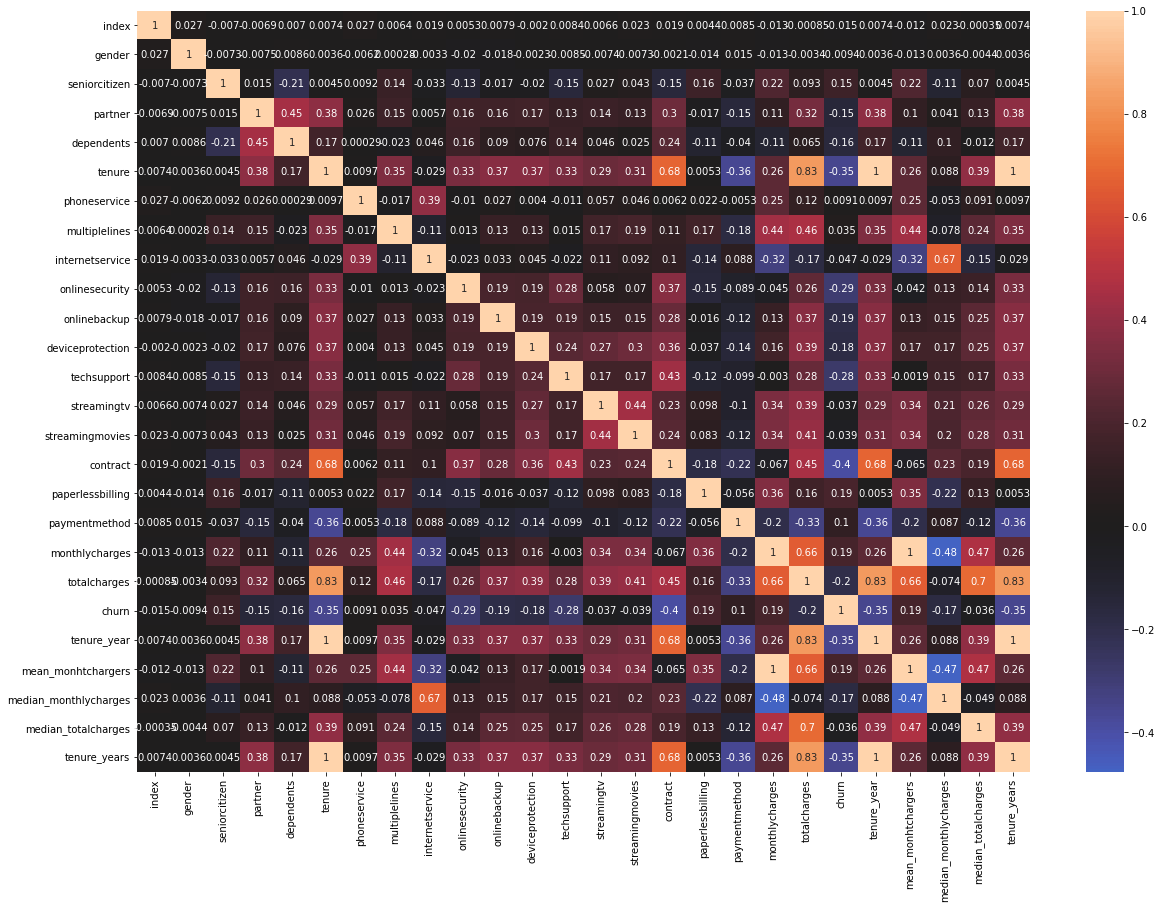

In [59]:
plt.figure(figsize = (20, 14))
sns.heatmap(df_le.corr(), center=0, annot=True)

plt.show()

&nbsp;&nbsp;&nbsp;По полученным данным тепловой карты можно отметить следующие признаки, которые коррелируют друг с другом: seniorcitizen, partner, dependents, tenure, phoneservice, multiplelines, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies, contract, paperlessbilling, monthlycharges, totalcharges, mean_monhtchargers, median_monthlycharges, median_totalcharges. 
<br><br>
&nbsp;&nbsp;&nbsp;Касательно корреляции признака оттока прослеживается взаимосвязь с признаками seniorcitizen, paperlessbilling, paymentmethod, monthlycharges и totalcharges. Необходимо рассмотреть более детально аудиторию, которая отказалась от услуг компании.

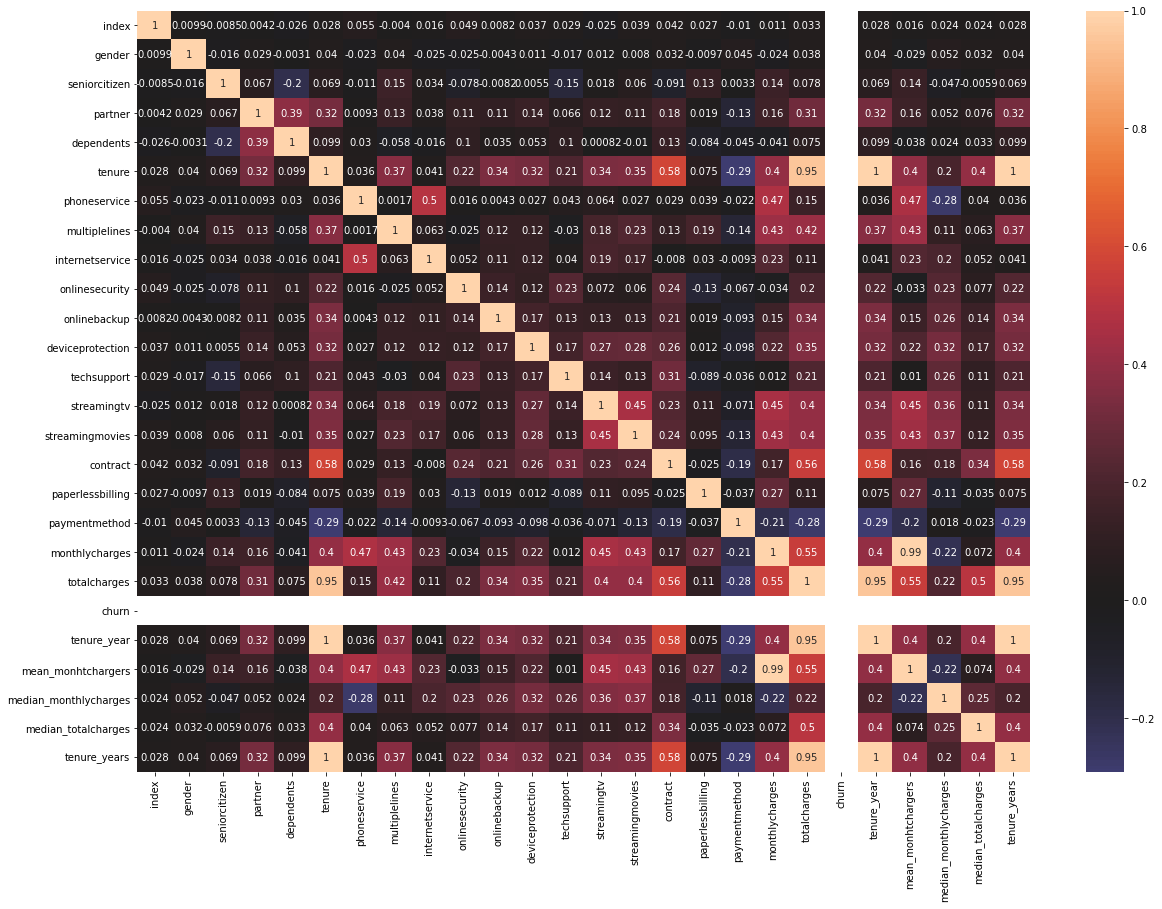

In [60]:
plt.figure(figsize = (20, 14))
sns.heatmap(df_le[df_le['churn']==1].corr(), center=0, annot=True)

plt.show()

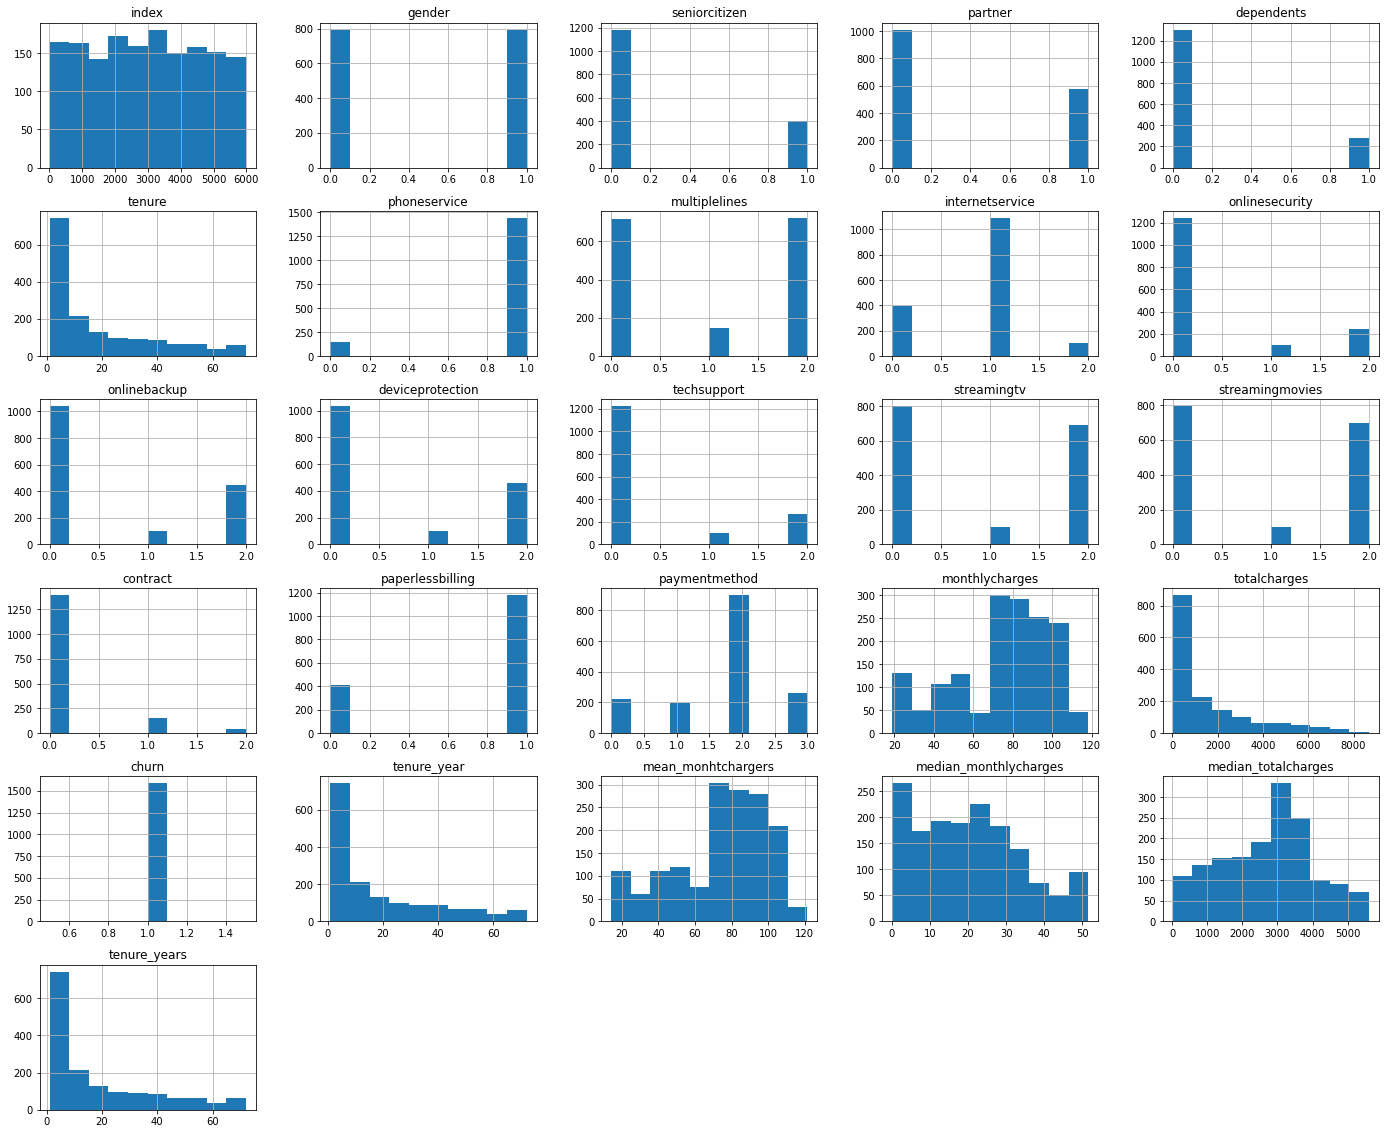

In [61]:
df_le[df_le['churn']==1].hist(figsize=(24.0, 20.0))
plt.show()

&nbsp;&nbsp;&nbsp;Изучив граффик корреляции признаков по аудитории ушедших клиентов отмечу взаимосвязь с признаками срока пользования услугами, наличием подключенных различных сервисов, типом контракта, службой поддержки и расходами на услуги. Стоит отметить, что общая сумма расходов выражено коррелирует с признаком срока пользования. 
<br><br>
&nbsp;&nbsp;&nbsp;Основываясь на этих данных могу сделать предположение о том, что клиенты уходят по причине невыгодных услуг (дорого или не качественно, либо отсутствие каких либо сервисов): стримингового телевидения, стримингового кинотеатра, телефонной связи, возможности просматривать записанные ранее ТВ-передачи и семейное положение.
<br><br>
&nbsp;&nbsp;&nbsp;Сопоставив данные по корреляции с графиком по сроку пользования услугами оператора можно отметить, что чаще всего отказываются от услуг компании в 1-2 года пользования услугами, больше всего в течение 10 месяцев.
<br><br>
&nbsp;&nbsp;&nbsp;Для прогнозирования оттока применю стекинг из различных моделей.


# 3. Построение моделей для прогнозирования оттока

In [6]:
# создаю несколько датасетов для моделей
data_le = df_le.copy() # 26 фичей
data_dum = df_dummies.copy() # 52 фичи 

print('Количество строк, количество фичей:', data_le.shape,data_dum.shape)

Количество строк, количество фичей: (5976, 26) (5976, 52)


Для удобства вывода различных метрик создам специальную функцию, в которую буду передавать модель, предсказание и проверочный сет, и возвращать метрики

In [7]:
def all_scores(model, y_pred, y_true):
    name_of_model = model
    ras = roc_auc_score(y_true, y_pred)
    cmat = confusion_matrix(y_true, y_pred)
    crep = classification_report(y_true, y_pred)
    # введу константу D для округления оценки
    D = 2
    print('{}: \nRoc auc score: {}\nConfusion matrix:\n{}\nClass report:\n{}'.format(name_of_model,
          np.round(ras, D), cmat, crep))

Полученные в 1 задании датасеты нуждаются в стандартизации и балансировке. 
<br><br>
Стандартизация позволит избавиться от возможных выбросов, а генерация семплов класса с 'churn' = 1 позволит моделям лучше определять объекты данного класса.
<br><br>
Для описанных операций напишу функцию.

In [8]:
x_dum = data_dum.drop('target', axis=1)
y_dum = data_dum.target

In [93]:
from imblearn.over_sampling import SMOTE, ADASYN
from collections import Counter

x = data_le.drop('churn', axis=1)
y = data_le.churn

# выполню стандартизацию для сглаживания данных
x = StandardScaler().fit_transform(x)

# SMOTE
X_resampled_s, y_resampled_s = SMOTE().fit_resample(x, y)

# ADASYN
X_resampled_a, y_resampled_a = ADASYN().fit_resample(x, y)

In [10]:
# SMOTE
x_train, x_test, y_train, y_test = train_test_split(X_resampled_s, y_resampled_s,
                                                    #train_size=0.6,
                                                    test_size=0.3,
                                                    #stratify=y_le,
                                                    random_state=42)

In [94]:
# ADASYN
x_train_a, x_test_a, y_train_a, y_test_a = train_test_split(X_resampled_a, y_resampled_a,
                                                    #train_size=0.6,
                                                    test_size=0.3,
                                                    #stratify=y_le,
                                                    random_state=42)

# Обучение моделей

На первом этапе обучу несколько модели без настройки гиперпараметров, чтобы оценить какая из моделей наиболее перспективна в решении поставленной задачи, в том числе применю ансамбли. Обучать модели первоначально буду на датасете data_le в двух вариациях с трансформациями SMOTE и ADASYN.  
<br>
Выборочно лучшие модели буду донастраивать с помощью поиска по сетке для получения лучших параметров, либо вручную подберу параметры для вышеуказанных целей. Также можно попробовать обучить модели на датасете data_dum, чтобы узнать улучшится ли точность модели или наоборот. 

# GradientBoostingClassifier

In [24]:
# инициация модели и обучение на трансформированных данных SMOTE
gbc = GradientBoostingClassifier(random_state=42).fit(x_train, y_train)

# получение предсказанных результатов
gbc_predict = gbc.predict(x_test)

# оценка точности модели
print('Score:', gbc.score(x_test, y_test), '\n')
all_scores(gbc, gbc_predict, y_test)

Score: 0.8337129840546698 

GradientBoostingClassifier(random_state=42): 
Roc auc score: 0.83
Confusion matrix:
[[1047  257]
 [ 181 1149]]
Class report:
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1304
           1       0.82      0.86      0.84      1330

    accuracy                           0.83      2634
   macro avg       0.83      0.83      0.83      2634
weighted avg       0.83      0.83      0.83      2634



Модель хорошо предсказывает нулевой класс, но менее точно класс "1"(TP), при том, что соотношение FN к TP по классу "1" выше чем по классу "0", при средне взвешанной оценке 0.84 против 0.83 (F1).
<br><br>
Пробую обучить модель на данных ADASYN. Аналогичные действия буду применять к остальным моделям

In [68]:
# обучение модели
gbc2 = GradientBoostingClassifier().fit(x_train_a, y_train_a)

# получение предсказанных результатов
gbc_predict2 = gbc2.predict(x_test_a)

# оценка точности модели
print('Score:', gbc2.score(x_test_a, y_test_a), '\n')
all_scores(gbc2, gbc_predict2, y_test_a)

Score: 0.8227943960620977 

GradientBoostingClassifier(): 
Roc auc score: 0.82
Confusion matrix:
[[1032  290]
 [ 178 1141]]
Class report:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82      1322
           1       0.80      0.87      0.83      1319

    accuracy                           0.82      2641
   macro avg       0.83      0.82      0.82      2641
weighted avg       0.83      0.82      0.82      2641



Показатели на данных обработанных с помощью ADASYN показывают немного худший результат.

# RandomForestClassifier

In [106]:
# инициация модели
rfc = RandomForestClassifier().fit(x_train, y_train)

# получение предсказанных результатов
rfc_predict = rfc.predict(x_test)

# оценка точности модели
print('Score:', rfc.score(x_test, y_test), '\n')
all_scores(rfc, rfc_predict, y_test)

Score: 0.8409263477600607 

RandomForestClassifier(): 
Roc auc score: 0.84
Confusion matrix:
[[1084  220]
 [ 199 1131]]
Class report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84      1304
           1       0.84      0.85      0.84      1330

    accuracy                           0.84      2634
   macro avg       0.84      0.84      0.84      2634
weighted avg       0.84      0.84      0.84      2634



In [107]:
# инициация модели
rfc2 = RandomForestClassifier().fit(x_train_a, y_train_a)

# получение предсказанных результатов
rfc_predict2 = rfc2.predict(x_test_a)

# оценка точности модели
print('Score:', rfc2.score(x_test_a, y_test_a), '\n')
all_scores(rfc2, rfc_predict2, y_test_a)

Score: 0.8386974630821659 

RandomForestClassifier(): 
Roc auc score: 0.84
Confusion matrix:
[[1065  257]
 [ 169 1150]]
Class report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1322
           1       0.82      0.87      0.84      1319

    accuracy                           0.84      2641
   macro avg       0.84      0.84      0.84      2641
weighted avg       0.84      0.84      0.84      2641



Датасет ресемплированный с помощью SMOTE опять показывает результат лучше чем по датасету ADASYN. 
<br><br>
Также отмечу, что Случайный лес классифицирует немного лучше чем Градиентный бустинг.
<br><br>
Если использовать параметры настроек обоих моделей, то можно улучшить результаты обоих моделей.

# SVC

In [85]:
# инициация модели
svc = SVC(random_state=42).fit(x_train, y_train)

# получение предсказанных результатов
svc_predict = svc.predict(x_test)

# оценка точности модели
print('Score:', svc.score(x_test, y_test), '\n')
all_scores(svc, svc_predict, y_test)

Score: 0.7782503037667071 

SVC(random_state=42): 
Roc auc score: 0.78
Confusion matrix:
[[2419  878]
 [ 582 2705]]
Class report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77      3297
           1       0.75      0.82      0.79      3287

    accuracy                           0.78      6584
   macro avg       0.78      0.78      0.78      6584
weighted avg       0.78      0.78      0.78      6584



In [84]:
# инициация модели
svc2 = SVC(random_state=42).fit(x_train_a, y_train_a)

# получение предсказанных результатов
svc_predict2 = svc2.predict(x_test_a)

# оценка точности модели
print('Score:', svc2.score(x_test_a, y_test_a), '\n')
all_scores(svc2, svc_predict2, y_test_a)

Score: 0.7849299507762211 

SVC(random_state=42): 
Roc auc score: 0.79
Confusion matrix:
[[ 928  394]
 [ 174 1145]]
Class report:
              precision    recall  f1-score   support

           0       0.84      0.70      0.77      1322
           1       0.74      0.87      0.80      1319

    accuracy                           0.78      2641
   macro avg       0.79      0.79      0.78      2641
weighted avg       0.79      0.78      0.78      2641



Метод опорных векторов без каких-либо настроек неплохо предсказывает класс "0" по отношению к классу "1".
<br><br>
На данном примере модель лучше предсказывает на датасете с большим количеством фичей, чем на датасете с меньшим количеством фичей. Могу отметить, что полнота (Recall) на уровне Случайного леса, но общая точность и точность предсказания клиентов ушедших из компании на низком уровне.

# LogisticRegression

In [110]:
# инициация модели
lr = LogisticRegression().fit(x_train, y_train)

# получение предсказанных результатов
lr_predict = lr.predict(x_test)

# оценка точности модели
print('Score:', lr.score(x_test, y_test), '\n')
all_scores(lr, lr_predict, y_test)

Score: 0.7642369020501139 

LogisticRegression(): 
Roc auc score: 0.76
Confusion matrix:
[[ 932  372]
 [ 249 1081]]
Class report:
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1304
           1       0.74      0.81      0.78      1330

    accuracy                           0.76      2634
   macro avg       0.77      0.76      0.76      2634
weighted avg       0.77      0.76      0.76      2634



In [111]:
# инициация модели
lr2 = LogisticRegression().fit(x_train_a, y_train_a)

# получение предсказанных результатов
lr_predict2 = lr2.predict(x_test_a)

# оценка точности модели
print('Score:', lr2.score(x_test_a, y_test_a), '\n')
all_scores(lr2, lr_predict2, y_test_a)

Score: 0.72699734948883 

LogisticRegression(): 
Roc auc score: 0.73
Confusion matrix:
[[ 857  465]
 [ 256 1063]]
Class report:
              precision    recall  f1-score   support

           0       0.77      0.65      0.70      1322
           1       0.70      0.81      0.75      1319

    accuracy                           0.73      2641
   macro avg       0.73      0.73      0.73      2641
weighted avg       0.73      0.73      0.73      2641



Логистическая регрессия хуже предсказывает оба класса, по сравнению с предыдущими моделями.

# KNeighborsClassifier

In [112]:
# инициация модели
knc = KNeighborsClassifier().fit(x_train, y_train)

# получение предсказанных результатов
knc_predict = knc.predict(x_test)

# оценка точности модели
print('Score:', knc.score(x_test, y_test), '\n')
all_scores(knc, knc_predict, y_test)

Score: 0.7896735003796507 

KNeighborsClassifier(): 
Roc auc score: 0.79
Confusion matrix:
[[ 856  448]
 [ 106 1224]]
Class report:
              precision    recall  f1-score   support

           0       0.89      0.66      0.76      1304
           1       0.73      0.92      0.82      1330

    accuracy                           0.79      2634
   macro avg       0.81      0.79      0.79      2634
weighted avg       0.81      0.79      0.79      2634



In [113]:
# инициация модели
knc2 = KNeighborsClassifier().fit(x_train_a, y_train_a)

# получение предсказанных результатов
knc_predict2 = knc2.predict(x_test_a)

# оценка точности модели
print('Score:', knc2.score(x_test_a, y_test_a), '\n')
all_scores(knc2, knc_predict2, y_test_a)

Score: 0.7705414615675881 

KNeighborsClassifier(): 
Roc auc score: 0.77
Confusion matrix:
[[ 767  555]
 [  51 1268]]
Class report:
              precision    recall  f1-score   support

           0       0.94      0.58      0.72      1322
           1       0.70      0.96      0.81      1319

    accuracy                           0.77      2641
   macro avg       0.82      0.77      0.76      2641
weighted avg       0.82      0.77      0.76      2641



Модель ближайших соседей показа слабый результат. Но стоит отметить, что данная модель хорошо классифицирует класс "0" и плохо класс "1", т.е. клиентов склонных к оттоку. 

# GaussianNB

In [114]:
# инициация модели
gbn = GaussianNB().fit(x_train, y_train)

# получение предсказанных результатов
gbn_predict = gbn.predict(x_test)

# оценка точности модели
print('Score:', gbn.score(x_test, y_test), '\n')
all_scores(gbn, gbn_predict, y_test)

Score: 0.7543659832953683 

GaussianNB(): 
Roc auc score: 0.75
Confusion matrix:
[[ 923  381]
 [ 266 1064]]
Class report:
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1304
           1       0.74      0.80      0.77      1330

    accuracy                           0.75      2634
   macro avg       0.76      0.75      0.75      2634
weighted avg       0.76      0.75      0.75      2634



In [115]:
# инициация модели
gbn2 = GaussianNB().fit(x_train_a, y_train_a)

# получение предсказанных результатов
gbn_predict2 = gbn2.predict(x_test_a)

# оценка точности модели
print('Score:', gbn2.score(x_test_a, y_test_a), '\n')
all_scores(gbn2, gbn_predict2, y_test_a)

Score: 0.7190458159787959 

GaussianNB(): 
Roc auc score: 0.72
Confusion matrix:
[[ 869  453]
 [ 289 1030]]
Class report:
              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1322
           1       0.69      0.78      0.74      1319

    accuracy                           0.72      2641
   macro avg       0.72      0.72      0.72      2641
weighted avg       0.72      0.72      0.72      2641



Отмечаем самую низкую точность модели

# XGBClassifier

In [116]:
# инициация модели
xgb = XGBClassifier().fit(x_train, y_train)

# получение предсказанных результатов
xgb_predict = xgb.predict(x_test)

# оценка точности модели
print('Score:', xgb.score(x_test, y_test), '\n')
all_scores(xgb, xgb_predict, y_test)

Score: 0.8451025056947609 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...): 
Roc auc score: 0.85
Confusion matrix:
[[1103  201]
 [ 207 1123]]
Class report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84      1304
           1       0.85      0.84      0.85      1330

    accuracy                

In [117]:
# инициация модели
xgb2 = XGBClassifier().fit(x_train_a, y_train_a)

# получение предсказанных результатов
xgb_predict2 = xgb2.predict(x_test_a)

# оценка точности модели
print('Score:', xgb2.score(x_test_a, y_test_a), '\n')
all_scores(xgb2, xgb_predict2, y_test_a)

Score: 0.8330177962892844 

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...): 
Roc auc score: 0.83
Confusion matrix:
[[1099  223]
 [ 218 1101]]
Class report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1322
           1       0.83      0.83      0.83      1319

    accuracy                

Попробую подобрать лучшие параметры для XGBoost, используюя минимум параметров, т.к. поиск по сетке по многочисленным параметрам с применением кросс-валидации весьма ресурсозатратный и долгий по времени. 

In [31]:
xgb_params = {'n_estimators': range(10, 100, 10),
              'eta': np.arange(0.1, 1., .1),
              'max_depth': range(1, 10, 1),
              'subsample': np.arange(0.1, 1., 0.2)}

skf = StratifiedKFold(n_splits=5)

xgb_grid = GridSearchCV(XGBClassifier(random_state=17), 
                        xgb_params, cv=skf).fit(x_train, y_train)

In [35]:
xgb_grid.best_estimator_ # посмотр лучшего оценщика

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False, eta=0.2,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.200000003, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=8, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=80, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=17,
              reg_alpha=0, ...)

In [36]:
xgb_grid.best_params_ # лучшие параметры модели

{'eta': 0.2,
 'max_depth': 8,
 'n_estimators': 80,
 'subsample': 0.9000000000000001}

In [37]:
xgb_grid.best_score_ # лучший скор

0.8520531244119448

In [41]:
all_scores(xgb_grid, y_test, xgb_grid.predict(x_test))

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interacti...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                      

XGBClassifier более точен в предсказании обоих классов. 

Проведя поиск по сетке удалось немного повысить точность модели XGBClassifier. Можно далее экспериментировать с настройками данной модели, чтобы повысит точность предсказания, но такая практика займет много времени. 
<br><br>
Обучу ещё несколько моделей классификаторов для пробы поиска наилучшего скора. 

# CatBoostClassifier

In [48]:
model = CatBoostClassifier(iterations=100,
                           depth=4,
                           learning_rate=0.3,
                           loss_function='Logloss',
                           verbose=10,
                           custom_metric=['Logloss',
                                          'AUC:hints=skip_train~false', 'F1'])

model.fit(x_train, y_train,
          eval_set=(x_test, y_test),
          use_best_model=True,
          logging_level='Verbose',
          plot=True)

preds_class = model.predict(x_test)
preds_proba = model.predict_proba(x_test)
print("class = ", preds_class)
print("proba = ", preds_proba)
print(model.get_best_score())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5770589	test: 0.5868980	best: 0.5868980 (0)	total: 4.52ms	remaining: 448ms
10:	learn: 0.3838484	test: 0.4048050	best: 0.4048050 (10)	total: 49ms	remaining: 396ms
20:	learn: 0.3463739	test: 0.3750167	best: 0.3750167 (20)	total: 86.6ms	remaining: 326ms
30:	learn: 0.3311470	test: 0.3700272	best: 0.3700272 (30)	total: 124ms	remaining: 276ms
40:	learn: 0.3131869	test: 0.3604742	best: 0.3604742 (40)	total: 163ms	remaining: 234ms
50:	learn: 0.2962230	test: 0.3494228	best: 0.3494228 (50)	total: 207ms	remaining: 199ms
60:	learn: 0.2851520	test: 0.3461546	best: 0.3460755 (59)	total: 258ms	remaining: 165ms
70:	learn: 0.2765309	test: 0.3471291	best: 0.3456862 (62)	total: 299ms	remaining: 122ms
80:	learn: 0.2678089	test: 0.3463864	best: 0.3446550 (74)	total: 342ms	remaining: 80.2ms
90:	learn: 0.2595802	test: 0.3446309	best: 0.3443647 (86)	total: 383ms	remaining: 37.9ms
99:	learn: 0.2526689	test: 0.3421663	best: 0.3421663 (99)	total: 424ms	remaining: 0us

bestTest = 0.3421663425
bestIter

In [42]:
print(f"Tree count: {str(model.tree_count_)}")

Tree count: 100


In [49]:
print('Скор на тренировочной выборке:', model.score(x_train, y_train),
      'Скор на тестовой выборке:', model.score(x_test, y_test))

Скор на тренировочной выборке: 0.8994140625 Скор на тестовой выборке: 0.8466211085801063


In [50]:
all_scores('CatBoostClassifier', preds_class, y_test)

CatBoostClassifier: 
Roc auc score: 0.85
Confusion matrix:
[[1100  204]
 [ 200 1130]]
Class report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1304
           1       0.85      0.85      0.85      1330

    accuracy                           0.85      2634
   macro avg       0.85      0.85      0.85      2634
weighted avg       0.85      0.85      0.85      2634



Точность CatBoostClassifier сопоставима с точностью XGBoostClassifier.
<br><br>
В качестве эксперимента попробую обучить модель на изначальном датасете и замерить результат

In [63]:
cat_features = ['gender',
                'partner',
                'dependents',
                'phoneservice',
                'multiplelines',
                'internetservice',
                'onlinesecurity',
                'onlinebackup',
                'deviceprotection',
                'techsupport',
                'streamingtv',
                'streamingmovies',
                'contract',
                'paperlessbilling',
                'paymentmethod']

#x_train, x_test, y_train, y_test
x_tr, x_te, y_tr, y_te = train_test_split(df.drop('churn', axis=1),
                                           df.churn,
                                           train_size=0.8,
                                           random_state=42)

new_model_full_df = CatBoostClassifier(
                               iterations=100,
                               depth=10,
                               learning_rate=0.03,
                               loss_function='Logloss',
                               verbose=10,
                               custom_metric=['Logloss',
                                              'AUC:hints=skip_train~false', 'F1'])

new_model_full_df.fit(X=x_tr, 
                      y=y_tr,
                      cat_features=cat_features,
                      use_best_model=True,
                      eval_set=(x_te, y_te),
                      plot=True)

preds_class = new_model_full_df.predict(x_te)
preds_proba = new_model_full_df.predict_proba(x_te)
print("class = ", preds_class)
print("proba = ", preds_proba)

print(new_model_full_df.get_best_score(),
     new_model_full_df.get_best_iteration())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6754099	test: 0.6759746	best: 0.6759746 (0)	total: 41.5ms	remaining: 4.11s
10:	learn: 0.5455094	test: 0.5532026	best: 0.5532026 (10)	total: 553ms	remaining: 4.47s
20:	learn: 0.4841835	test: 0.4966944	best: 0.4966944 (20)	total: 1.05s	remaining: 3.94s
30:	learn: 0.4471648	test: 0.4666030	best: 0.4666030 (30)	total: 1.65s	remaining: 3.67s
40:	learn: 0.4193788	test: 0.4485198	best: 0.4485198 (40)	total: 2.14s	remaining: 3.08s
50:	learn: 0.4001655	test: 0.4372878	best: 0.4372878 (50)	total: 2.62s	remaining: 2.52s
60:	learn: 0.3856304	test: 0.4299619	best: 0.4299619 (60)	total: 3.07s	remaining: 1.96s
70:	learn: 0.3679936	test: 0.4265167	best: 0.4265167 (70)	total: 3.55s	remaining: 1.45s
80:	learn: 0.3538981	test: 0.4250849	best: 0.4247268 (79)	total: 4.12s	remaining: 965ms
90:	learn: 0.3442269	test: 0.4242694	best: 0.4242694 (90)	total: 4.56s	remaining: 451ms
99:	learn: 0.3348618	test: 0.4236597	best: 0.4236505 (96)	total: 4.93s	remaining: 0us

bestTest = 0.4236504852
bestIterat

In [64]:
print('Tree count: ', new_model_full_df.tree_count_)

Tree count:  97


In [65]:
print('Скор на тренировочной выборке:', new_model_full_df.score(x_tr, y_tr),
      'Скор на тестовой выборке:', new_model_full_df.score(x_te, y_te))

Скор на тренировочной выборке: 0.850250626566416 Скор на тестовой выборке: 0.8071786310517529


Скор на тестовой выборке хуже, чем на тренировочной. Модель переобучается после 97 итерации. Попробуем обучить ещё одну модель.
<br><br>
Обучение модели на изначальном датасете по итогу дало плохой результат. Но его возможно улучшить, если подобрать лучшие параметры модели.

# CatBoost

Попробую обучить модель CatBoost на полном датасете. Особенностью данной модели является то, что можно подать на обучение не трансформированный датасет, т.е. категории не переведены в числовой формат, датасет не подвергался стандартизации, а т.ж. балансировке.
<br><br>
Сразу задам некоторые параметры модели.

In [67]:
params = {'loss_function': 'Logloss',
          'eval_metric': 'F1',
          'iterations': 1000,
          'custom_loss': 'AUC',
          'random_seed': 63,
          'learning_rate': 0.5}

# инициация модели
cb = CatBoost(params=params).fit(X=df.drop('churn', axis=1), 
                    y=df.churn.eq('Yes').mul(1),
                    cat_features=cat_features,
                    eval_set=(x_te, y_te.eq('Yes').mul(1)),
                    verbose=100,
                    use_best_model=True,
                    plot=True)

# получение предсказанных результатов
cb_predict_train = cb.predict(x_tr)
cb_predict = cb.predict(x_te)

# результаты
preds_class = cb.predict(x_te)
#preds_proba = cb.predict_proba(x_te)
print("class = ", preds_class)
#print("proba = ", preds_proba)

# оценка
print('\nРезультат по обучающему датасету: \n', cb.get_best_score(), roc_auc_score(y_tr, cb_predict_train))
print('\nРезультат по тестовому датасету: \n',cb.get_best_score(), roc_auc_score(y_te, cb_predict))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.4759967	test: 0.4410480	best: 0.4410480 (0)	total: 32.8ms	remaining: 32.8s
100:	learn: 0.8366453	test: 0.7729636	best: 0.7791304 (97)	total: 2.46s	remaining: 21.9s
200:	learn: 0.9420524	test: 0.8465430	best: 0.8551959 (188)	total: 4.82s	remaining: 19.1s
300:	learn: 0.9835443	test: 0.9033333	best: 0.9063545 (297)	total: 7.13s	remaining: 16.6s
400:	learn: 0.9962145	test: 0.9370861	best: 0.9370861 (396)	total: 9.62s	remaining: 14.4s
500:	learn: 0.9996850	test: 0.9403974	best: 0.9468439 (460)	total: 12.2s	remaining: 12.2s
600:	learn: 1.0000000	test: 0.9517471	best: 0.9534884 (528)	total: 14.6s	remaining: 9.68s
700:	learn: 1.0000000	test: 0.9568106	best: 0.9621087 (679)	total: 17s	remaining: 7.26s
800:	learn: 1.0000000	test: 0.9651741	best: 0.9651741 (759)	total: 19.5s	remaining: 4.84s
900:	learn: 1.0000000	test: 0.9635762	best: 0.9685950 (869)	total: 22s	remaining: 2.42s
999:	learn: 1.0000000	test: 0.9636964	best: 0.9685950 (869)	total: 24.4s	remaining: 0us

bestTest = 0.968595

Отличный результат! Точность на тестовой выборке по метрике AOC 0.99 и 0.96 по F1_score, при том, что был использован параметр модели, который фиксирует лучший результат до момента переобучения модели.

# Ансабль StackingClassifier

В качестве эксперимента попробую обучить ансамбль из разных моделей с мета-моделью - XGBClassifier

In [69]:
# формирование списка моделей
estimators = [('gbc', GradientBoostingClassifier()),
              ('rfc', RandomForestClassifier()), 
              ('svc', SVC()), 
              ('lr', LogisticRegression()), 
              ('knc', KNeighborsClassifier()), 
              ('gbn', GaussianNB())]

# итоговый оценщик
final_estimator = XGBClassifier()

# настройка стека
stack_classifier = StackingClassifier(estimators=estimators,
                                      final_estimator=final_estimator,
                                     cv=5)
# обучение стека
stack_classifier.fit(x_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('gbc', GradientBoostingClassifier()),
                               ('rfc', RandomForestClassifier()),
                               ('svc', SVC()), ('lr', LogisticRegression()),
                               ('knc', KNeighborsClassifier()),
                               ('gbn', GaussianNB())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_st...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 n_estimators=100, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 predictor=None,
                                                 random_state=None,
                                                 reg_alpha=None,
                                                 reg_lambda=None, ...))

In [76]:
print('Скор на тренировочной выбрке: ', stack_classifier.score(x_train,y_train), 
      '\nСкор на тестовой выбрке: ',stack_classifier.score(x_test,y_test))

Скор на тренировочной выбрке:  0.9659830729166666 
Скор на тестовой выбрке:  0.8413059984813971


In [71]:
all_scores(stack_classifier, stack_classifier.predict(x_test), y_test)

StackingClassifier(cv=5,
                   estimators=[('gbc', GradientBoostingClassifier()),
                               ('rfc', RandomForestClassifier()),
                               ('svc', SVC()), ('lr', LogisticRegression()),
                               ('knc', KNeighborsClassifier()),
                               ('gbn', GaussianNB())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_st...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constrai

Стекинг с регрессорами показывает очень хороший результат на тренировочных данных и плохой на тестовых и результат явно хуже чем у CatBoost.
<br><br>
Предприниму ещё одну попытку получить лучший скор и опробую обучение стека на датасете полученным с помощью pd.get_dummies().

In [79]:
x = data_dum.drop('target', axis=1)
y = data_dum.target

# выполню стандартизацию для сглаживания данных
x = StandardScaler().fit_transform(x)

X_resampled_s, y_resampled_s = SMOTE().fit_resample(x, y)

# разделение данных на тренировочную и валидационную выборку
x_train, x_test, y_train, y_test = train_test_split(X_resampled_s, y_resampled_s,
                                                    train_size=0.25,
                                                    random_state=42)

stack_cl2 = stack_classifier.fit(x_train, y_train)
print(stack_cl2.score(x_train,y_train), stack_cl2.score(x_test,y_test))

0.9366453965360073 0.8165249088699879


In [80]:
all_scores(stack_cl2, stack_cl2.predict(x_train), y_train)

StackingClassifier(cv=5,
                   estimators=[('gbc', GradientBoostingClassifier()),
                               ('rfc', RandomForestClassifier()),
                               ('svc', SVC()), ('lr', LogisticRegression()),
                               ('knc', KNeighborsClassifier()),
                               ('gbn', GaussianNB())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_st...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constrai

In [81]:
all_scores(stack_cl2, stack_cl2.predict(x_test), y_test)

StackingClassifier(cv=5,
                   estimators=[('gbc', GradientBoostingClassifier()),
                               ('rfc', RandomForestClassifier()),
                               ('svc', SVC()), ('lr', LogisticRegression()),
                               ('knc', KNeighborsClassifier()),
                               ('gbn', GaussianNB())],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks=None,
                                                 colsample_bylevel=None,
                                                 colsample_bynode=None,
                                                 colsample_bytree=None,
                                                 early_st...
                                                 gpu_id=None, grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constrai

Результат по второму датасету (с большим количеством фичей) лучше предсказывает на тренировочном датасете и хуже на тестовом. Точность предсказания, в любом случае хуже, чем у CatBoost.
<br><br>
Для повышения точности модели потребуется подбирать различные параметры самих моделей внутри стака, так и мета-модели, что потребует значительное время. В рамках учебного задания ограничусь выбором наилучшей модели.

# 4. Сравнение качества моделей 

В текущей работе был произведён анализ данных телекоммуникационной компании в целях выявления факторов указывающих на вероятность отказа клиента от обслуживания. 
<br><br>
По ходу исследования было выявлено, что наличие доп.услуг или отсутствие таковых (т.е. или дорого или не удовлетворяет потребность клиента), либо вовсе не возможность получить услугу, а стоимость обслуживания влияют на отток клиентов.
<br><br>
Главной задачей было спрогнозировать отток пользователей, для этих целей было выбрано решение обучить различные модели и оценить их точность с базовыми настройками, а далее, если есть перспектива повышения качества моделей примерить настройку параметров. Также модели обучались на разных датасетах с большим и меньшим количеством фичей, а в некоторых случаях на изначальном датасете с минимальными корректировками (убрать ненужные фичи и заполнить NaN).
<br><br>
Точность каждой модели можно улучшить, но в рамках учебного процесса и ограниченности производительной мощности ПК было принято решение найти наиболее перспективную модель, отвечающую требованиям задачи и улучшить её качество.
<br><br>
Оценка качества моделей была приведена в 3-м блоке. 
<br>
Самая лучшая модель, которая почти со 100% вероятностью предсказывает отток - это CatBoost, в то время, как остальные модели, в лучшем случае отмечали точность на уровне 0.84-0.85% по метрике ROC AUC, либо хорошо предсказывали данные на тренировочном датасете и плохо на тестовом. 